Dataset Description artist: Name of the Artist.

song: Name of the Track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration in milliseconds :Time of the song

time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

Class: Genre of the track.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
import pickle
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter

### Upload dataset

In [ ]:
train_data = pd.read_csv('train.csv')

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
#split music data into data & labels
#from sklearn.model_selection import train_test_split
#train_data ,test_set = train_test_split(train_data,test_size = 0.2,random_state = 42)

### Info about the Data

In [ ]:
train_data.shape

(14396, 18)

In [ ]:
train_data.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,0,"Lata Mangeshkar, Hariharan",Likha Hai Yeh,23.0,0.370,0.670,7.0,-11.007,0,0.0445,0.8090,0.000006,0.2360,0.802,177.164,5.209333,3,3
1,1,Kalan.FrFr,No Love ft. Mozzy & Cypress Moreno,45.0,0.659,0.639,6.0,-8.138,1,0.3880,0.4160,NaN,0.1160,0.688,99.517,206602.000000,4,5
2,2,The Cure,Play For Today,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.000000,4,6
3,3,Miguel Poveda,Coplas Del Querer,40.0,0.508,0.287,5.0,-8.898,0,0.0481,0.8340,NaN,0.0963,0.324,96.139,332467.000000,3,9
4,4,Leif Vollebekk,Long Blue Light,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.000000,4,1


### Descriptive Statistics

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14045 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12784 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10837 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
train_data['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

### Data Cleaning

#### Checking for Null Values

In [ ]:
#checking for null values
train_data.isnull().sum()

id                       0
Artist Name              0
Track Name               0
Popularity             351
danceability             0
energy                   0
key                   1612
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3559
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                      0
Artist Name             0
Track Name              0
Popularity             77
danceability            0
energy                  0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      818
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
# Dropping rows where name is null
train_data.dropna(subset=['Artist Name'], axis=0, inplace=True) 

### fill null columns

In [ ]:
train_data['Popularity'] = train_data['Popularity'].fillna(train_data['Popularity'].mean())

In [ ]:
train_data['key'] = train_data['key'].fillna(train_data['key'].mean())

In [ ]:
train_data['instrumentalness'] = train_data['instrumentalness'].fillna(train_data['instrumentalness'].mean())

In [ ]:
train_data.nunique()

id                    14396
Artist Name            7891
Track Name            12396
Popularity              100
danceability            890
energy                 1158
key                      12
loudness               7980
mode                      2
speechiness            1171
acousticness           3705
instrumentalness       3944
liveness               1399
valence                1268
tempo                 11332
duration_in min/ms    11702
time_signature            4
Class                    11
dtype: int64

## Remoivng Duplicate rows

In [ ]:
dups = train_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(train_data.shape)

Number of duplicate rows = 0
(14396, 18)


In [ ]:
cols = train_data.columns.tolist()
to_remove = ['id', 'popularity', 'duration_ms', 'explicit','release_date', 'time_signature', 'key', 'mode']
reqd_cols = list(set(cols).difference(set(to_remove)))

#Dropping Duplicates
train_data.drop_duplicates(subset=reqd_cols, keep=False, ignore_index=True, inplace=True)

In [ ]:
print('Before',train_data.shape)
train_data.drop_duplicates(inplace=True) 
print('After',train_data.shape)

Before (14396, 18)
After (14396, 18)


In [ ]:
train_data.describe()

,id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7197.500000,44.591954,0.542981,0.663347,5.957838,-7.897393,0.638580,0.079479,0.246606,0.177489,0.195594,0.486931,122.729981,2.009550e+05,3.927341,6.695679
std,4155.911573,17.222647,0.166668,0.235709,3.006676,4.063214,0.480429,0.083048,0.310371,0.263871,0.158487,0.240281,29.558253,1.118463e+05,0.352828,3.206170
min,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.013600,0.018300,34.132000,5.339167e-01,1.000000,0.000000
25%,3598.750000,33.000000,0.430000,0.510000,4.000000,-9.525250,0.000000,0.034800,0.004208,0.000307,0.097400,0.299000,99.799000,1.669988e+05,4.000000,5.000000
50%,7197.500000,44.000000,0.545000,0.701000,5.957838,-7.006000,1.000000,0.047400,0.080750,0.051600,0.129000,0.481000,120.069500,2.095845e+05,4.000000,8.000000
75%,10796.250000,56.000000,0.659000,0.861000,8.000000,-5.161000,1.000000,0.082500,0.434000,0.177489,0.257000,0.673000,141.990250,2.522970e+05,4.000000,10.000000
max,14395.000000,100.000000,0.989000,0.999000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
train_data["Class"].unique()

array([ 3,  5,  6,  9,  1, 10,  0,  7,  2,  8,  4])

## Data Analysis & Visualization

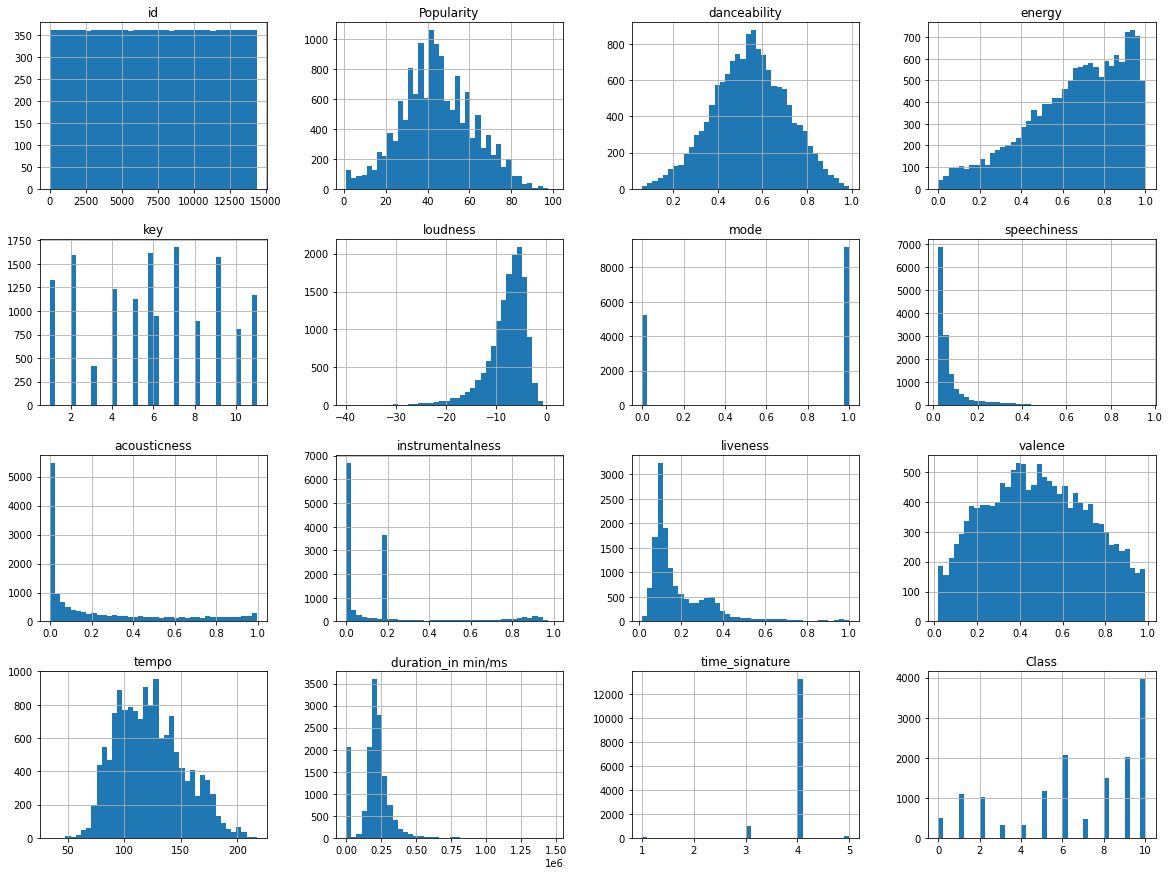

In [ ]:
train_data.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
corr_matrix = train_data.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class                 1.000000
energy                0.221837
duration_in min/ms    0.205521
loudness              0.179647
Popularity            0.157128
time_signature        0.047389
liveness              0.041245
tempo                 0.031248
id                   -0.004332
key                  -0.009951
instrumentalness     -0.022177
mode                 -0.043674
speechiness          -0.055894
valence              -0.078111
danceability         -0.101228
acousticness         -0.241062
Name: Class, dtype: float64

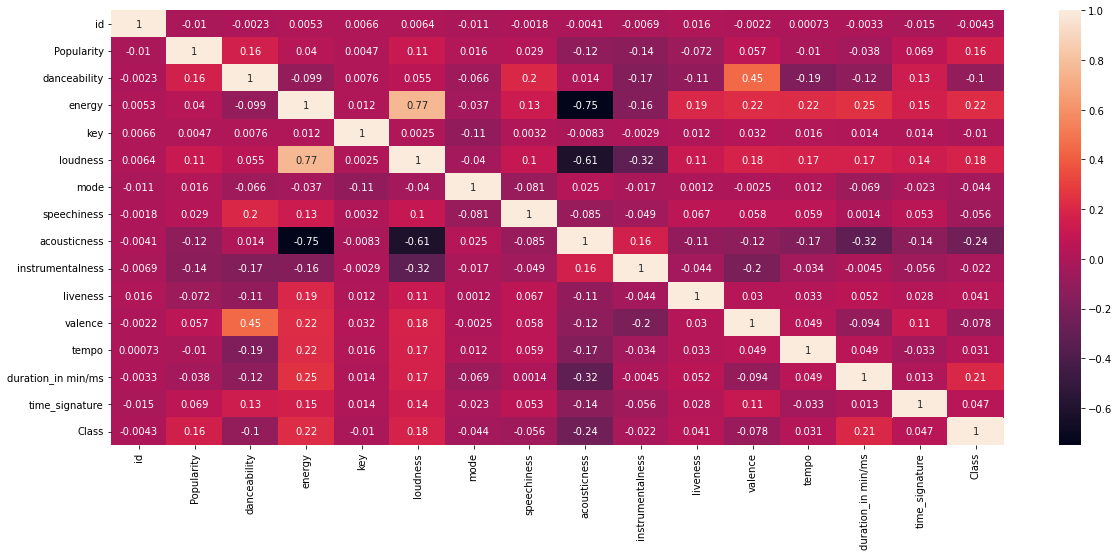

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (20, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = train_data, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

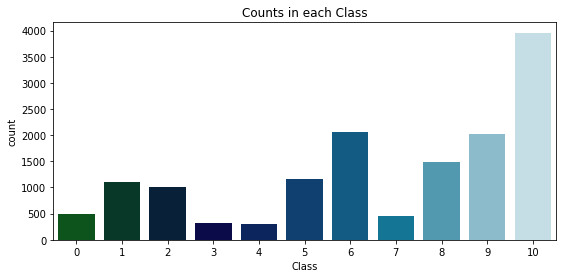

In [ ]:
plt.figure(figsize = (9, 4))
plot_counts("Class")

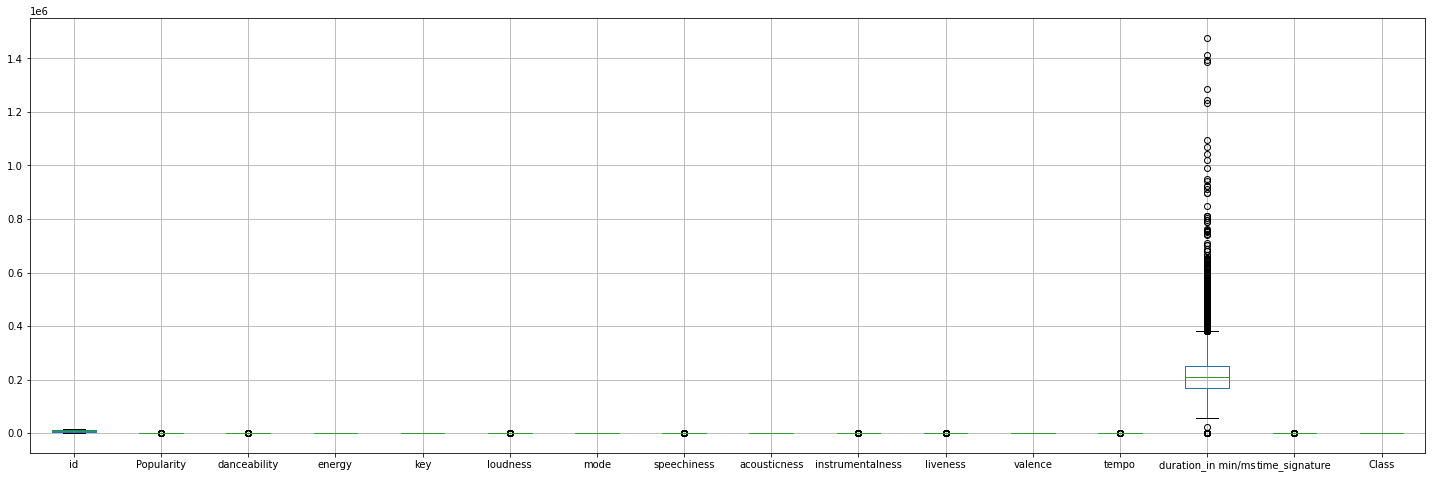

In [ ]:
plt.figure(figsize = (25,8))
train_data.boxplot()

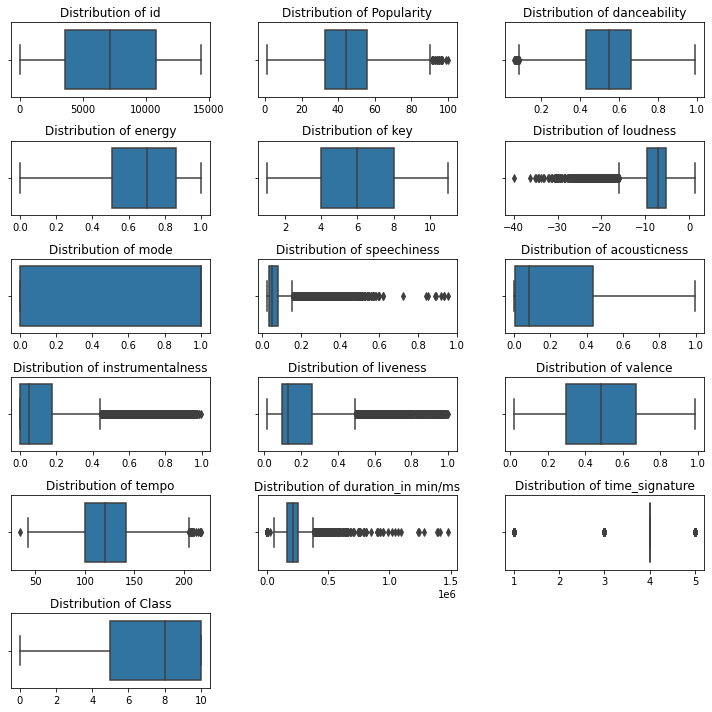

In [ ]:
df_cont = train_data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [ ]:
#remove outliers
q3 = train_data.quantile(0.75)
q1 = train_data.quantile(0.25)
iqr = q3 - q1

In [ ]:
train_data1 = train_data[~((train_data < (q1 - 1.5 * iqr)) | (train_data > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
train_data.shape

(14396, 18)

In [ ]:
train_data1.shape

(7865, 18)

In [ ]:
train_data1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

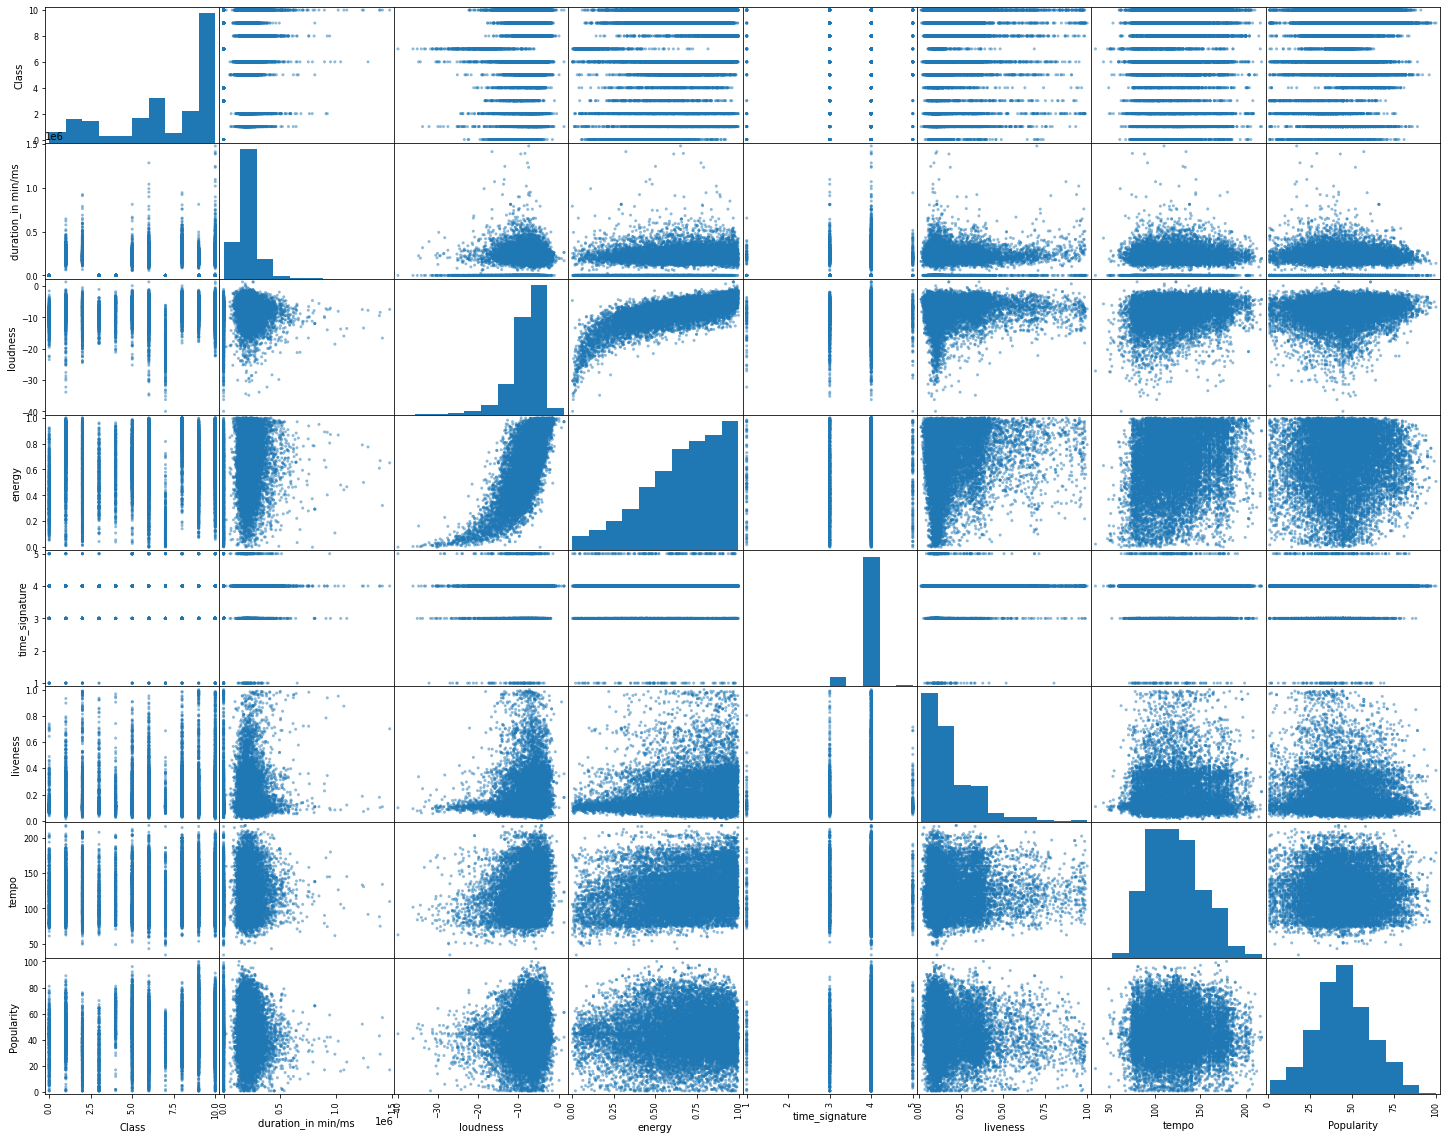

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["Class", "duration_in min/ms", "loudness","energy","time_signature","liveness","tempo","Popularity"]
scatter_matrix(train_data[attributes], figsize=(25, 20));

In [ ]:
train_data1['Popularity'] = train_data1['Popularity'].fillna(train_data1['Popularity'].mean())

In [ ]:
train_data1['key'] = train_data1['key'].fillna(train_data1['key'].mean())

In [ ]:
train_data1['instrumentalness'] = train_data1['instrumentalness'].fillna(train_data1['instrumentalness'].mean())

In [ ]:
train_data1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

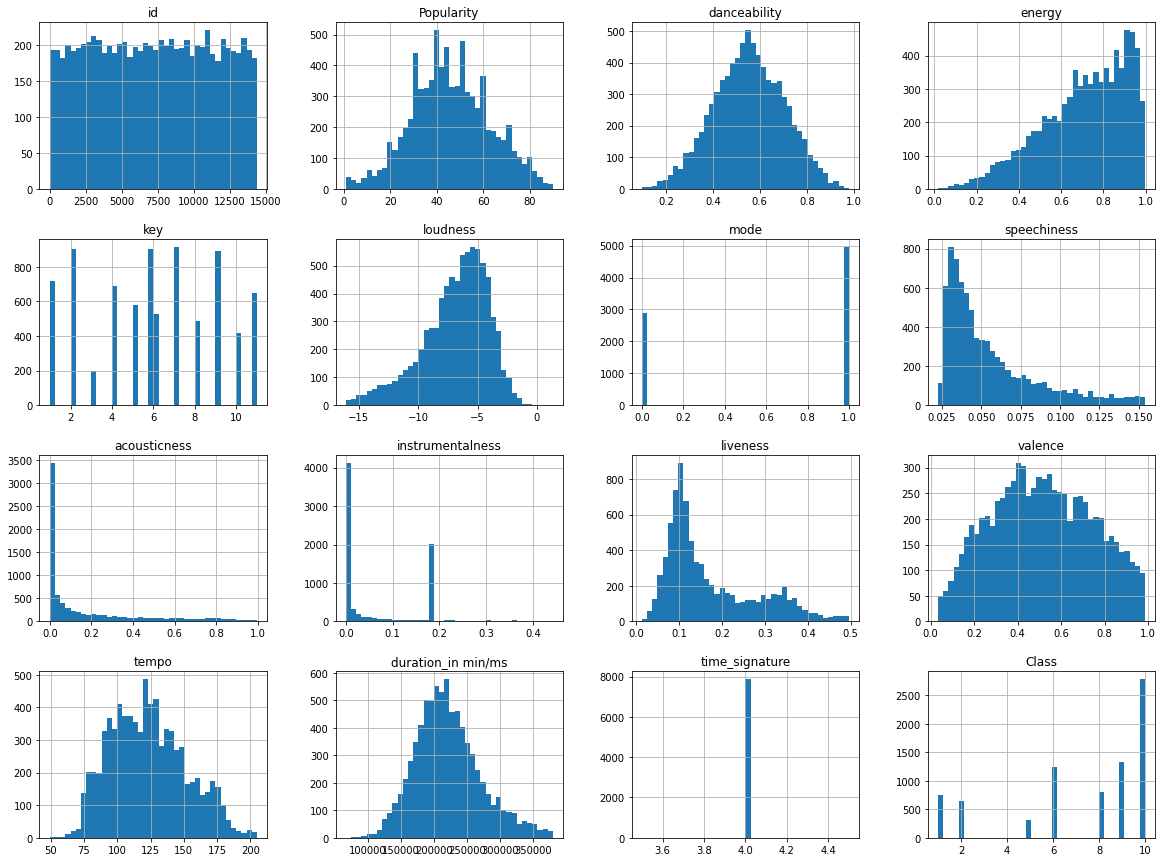

In [ ]:
train_data1.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
corr_matrix1 = train_data1.corr()
corr_matrix1["Class"].sort_values(ascending=False)

Class                 1.000000
Popularity            0.152834
loudness              0.144977
energy                0.138288
duration_in min/ms    0.064732
instrumentalness      0.050425
tempo                 0.029485
speechiness           0.002684
liveness              0.001726
id                   -0.008841
key                  -0.019218
mode                 -0.035955
danceability         -0.094015
valence              -0.107052
acousticness         -0.132026
time_signature             NaN
Name: Class, dtype: float64

In [ ]:
cat_cols = ['key', 'mode', 'time_signature']
train_data1.drop(cat_cols, axis=1, inplace=False).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
Class,7865.0,7.286332,3.107255,1.000000,6.000000,9.00000,10.000000,10.000
Popularity,7865.0,46.057856,16.688828,1.000000,34.000000,45.00000,57.000000,90.000
acousticness,7865.0,0.182990,0.257580,0.000001,0.002440,0.04690,0.278000,0.996
danceability,7865.0,0.553910,0.149886,0.098100,0.450000,0.55300,0.660000,0.980
duration_in min/ms,7865.0,221597.868023,50019.129761,66884.000000,187447.000000,216571.00000,250307.000000,380093.000
energy,7865.0,0.708538,0.201121,0.017100,0.574000,0.74100,0.878000,0.998
id,7865.0,7191.449078,4134.107330,2.000000,3574.000000,7204.00000,10777.000000,14394.000
instrumentalness,7865.0,0.073328,0.095370,0.000001,0.000142,0.00767,0.177489,0.443
liveness,7865.0,0.172572,0.105294,0.013600,0.095900,0.12900,0.234000,0.496
loudness,7865.0,-6.858922,2.770254,-16.069000,-8.399000,-6.38300,-4.845000,1.342


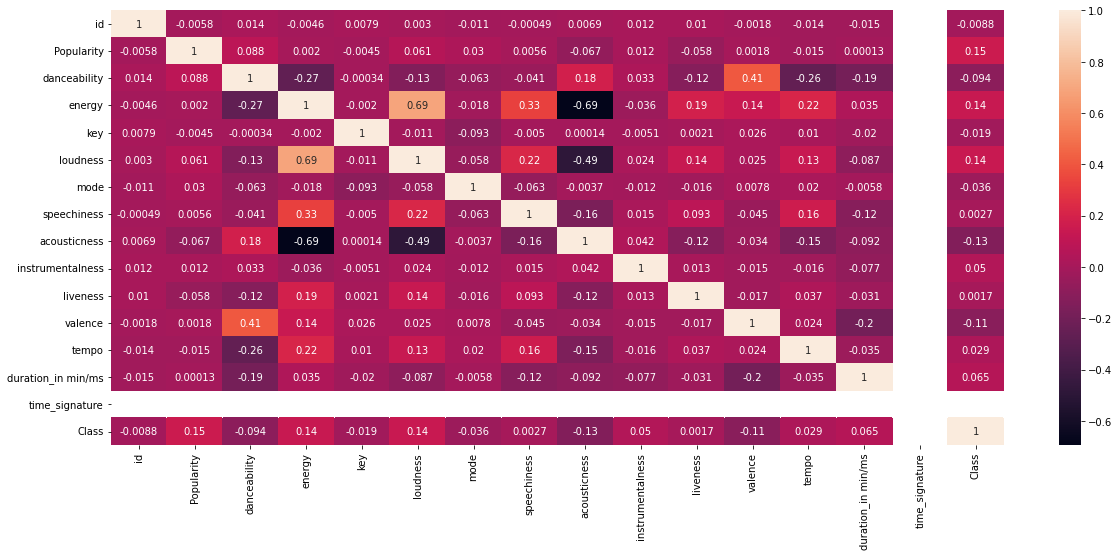

In [ ]:
# Plot the correlation with seaborn
plt.subplots(figsize = (20, 8))
sns.heatmap(corr_matrix1, annot = True)
plt.show()

In [ ]:
s = (train_data1.dtypes =="object")
object_cols = list(s[s].index)
object_cols

['Artist Name', 'Track Name']

In [ ]:
train_data1.isnull().sum()

id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
# train_data1.drop(columns=['Track Name'], inplace = True)
# train_data1.drop(columns=['id'], inplace = True)
# train_data1.drop(columns=['key'], inplace = True)
# train_data1.drop(columns=['Artist Name'], inplace = True)

In [ ]:
train_data1['Track Name'] =LabelEncoder().fit_transform(train_data1['Track Name'])

In [ ]:
test_data['Track Name'] =LabelEncoder().fit_transform(test_data['Track Name'])

In [ ]:
enc = OrdinalEncoder(categories=[train_data1["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
train_data1[['Artist Name']]=enc.fit_transform(train_data1[['Artist Name']])

In [ ]:
enc = OrdinalEncoder(categories=[test_data["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
test_data[['Artist Name']]=enc.fit_transform(test_data[['Artist Name']])

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   int64  
 2   Track Name          3600 non-null   int64  
 3   Popularity          3523 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3198 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2782 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

In [ ]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7865 entries, 2 to 14394
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  7865 non-null   int64  
 1   Artist Name         7865 non-null   int64  
 2   Track Name          7865 non-null   int64  
 3   Popularity          7865 non-null   float64
 4   danceability        7865 non-null   float64
 5   energy              7865 non-null   float64
 6   key                 7865 non-null   float64
 7   loudness            7865 non-null   float64
 8   mode                7865 non-null   int64  
 9   speechiness         7865 non-null   float64
 10  acousticness        7865 non-null   float64
 11  instrumentalness    7865 non-null   float64
 12  liveness            7865 non-null   float64
 13  valence             7865 non-null   float64
 14  tempo               7865 non-null   float64
 15  duration_in min/ms  7865 non-null   float64
 16  time_

In [ ]:
X_train= train_data1.drop(["Class"],axis =1)
y_train= train_data1["Class"]

In [ ]:
smote = SMOTE()

In [ ]:
x_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print('Origianl dataset shape:', Counter(y_train))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({10: 2782, 9: 1328, 6: 1242, 8: 809, 1: 748, 2: 639, 5: 317})
Resampple dataset shape: Counter({6: 2782, 1: 2782, 10: 2782, 2: 2782, 8: 2782, 5: 2782, 9: 2782})


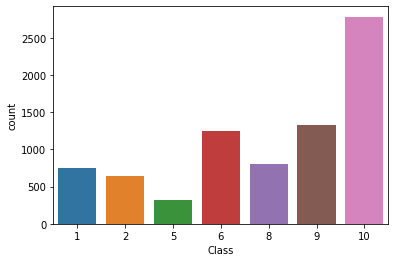

In [ ]:
sns.countplot(train_data1["Class"])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote,test_size=0.25, random_state=7)

In [ ]:
X_train.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
2,2,4325,3841,51.0,0.458,0.731,11.0,-12.049,0,0.1450,0.0487,0.021500,0.1160,0.784,80.425,218960.0,4
4,4,1541,3002,63.0,0.552,0.485,9.0,-9.111,1,0.0332,0.5170,0.106000,0.1640,0.510,71.548,200173.0,4
5,5,4156,1522,74.0,0.558,0.768,2.0,-9.997,1,0.0343,0.1210,0.062600,0.1240,0.429,81.909,260573.0,4
10,10,690,5431,33.0,0.367,0.637,6.0,-6.565,1,0.0299,0.0521,0.023600,0.1290,0.156,74.048,229040.0,4
12,12,46,1158,68.0,0.398,0.890,1.0,-2.248,0,0.0473,0.0252,0.177489,0.0472,0.572,95.095,212938.0,4


In [ ]:
test_data.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0,2109,2306,52.0,0.522,0.726,4.0,-4.115,1,0.0383,0.348000,0.000005,0.1480,0.331,161.867,189587.0,4
1,1,1094,1293,69.0,0.754,0.449,4.0,-14.013,1,0.0615,0.724000,NaN,0.1620,0.973,82.751,211880.0,4
2,2,313,1665,50.0,0.607,0.477,9.0,-12.904,1,0.0333,0.708000,NaN,0.2530,0.887,136.614,122600.0,4
3,3,314,1511,40.0,0.484,0.872,1.0,-5.586,1,0.0559,0.000384,0.000672,0.1480,0.347,150.027,222208.0,4
4,4,315,913,64.0,0.639,0.843,11.0,-4.975,1,0.0362,0.052500,NaN,0.0854,0.528,126.047,217802.0,4


In [ ]:
train_grp = X_train.groupby('instrumentalness').mean().reset_index()

In [ ]:
test_merged = test_data.merge(train_grp, on='instrumentalness', suffixes=['_test', '_train'])

In [ ]:
print(test_merged)

      id_test  Artist Name_test  Track Name_test  Popularity_test  \
0           0              2109             2306             52.0   
1           3               314             1511             40.0   
2           5              2766             3425             53.0   
3           6               316             1513             49.0   
4         186              2448             2888             44.0   
...       ...               ...              ...              ...   
1646     3580              2042             1416             38.0   
1647     3590              1897             1646             21.0   
1648     3592              2480              681             76.0   
1649     3596              1894             1030             45.0   
1650     3599              1383             3390             24.0   

      danceability_test  energy_test  loudness_test  mode_test  \
0                 0.522        0.726         -4.115          1   
1                 0.484        0.872   

In [ ]:
test_cols = [col for col in test_merged.columns if 'test' in col]
train_cols = [col for col in test_merged.columns if 'train' in col]
dict_cols =dict(zip(test_cols, train_cols))

In [ ]:
print(test_cols)

['id_test', 'Artist Name_test', 'Track Name_test', 'Popularity_test', 'danceability_test', 'energy_test', 'loudness_test', 'mode_test', 'speechiness_test', 'acousticness_test', 'liveness_test', 'valence_test', 'tempo_test', 'duration_in min/ms_test', 'time_signature_test']


In [ ]:
print(train_cols)

['id_train', 'Artist Name_train', 'Track Name_train', 'Popularity_train', 'danceability_train', 'energy_train', 'loudness_train', 'mode_train', 'speechiness_train', 'acousticness_train', 'liveness_train', 'valence_train', 'tempo_train', 'duration_in min/ms_train', 'time_signature_train']


In [ ]:
print(dict_cols)

{'id_test': 'id_train', 'Artist Name_test': 'Artist Name_train', 'Track Name_test': 'Track Name_train', 'Popularity_test': 'Popularity_train', 'danceability_test': 'danceability_train', 'energy_test': 'energy_train', 'loudness_test': 'loudness_train', 'mode_test': 'mode_train', 'speechiness_test': 'speechiness_train', 'acousticness_test': 'acousticness_train', 'liveness_test': 'liveness_train', 'valence_test': 'valence_train', 'tempo_test': 'tempo_train', 'duration_in min/ms_test': 'duration_in min/ms_train', 'time_signature_test': 'time_signature_train'}


In [ ]:
for test, train in dict_cols.items():
    test_merged[test] = np.where(test_merged[test].isnull(), 
                                 test_merged[train], 
                                 test_merged[test])

In [ ]:
test_merged.drop(train_cols, axis=1, inplace=True)
test_merged.columns = test_merged.columns.str.replace('_test', '')

In [ ]:
print(test_merged)

          id  Artist Name  Track Name  Popularity  danceability  energy  \
0        0.0       2109.0      2306.0        52.0         0.522   0.726   
1        3.0        314.0      1511.0        40.0         0.484   0.872   
2        5.0       2766.0      3425.0        53.0         0.664   0.354   
3        6.0        316.0      1513.0        49.0         0.377   0.450   
4      186.0       2448.0      2888.0        44.0         0.392   0.897   
...      ...          ...         ...         ...           ...     ...   
1646  3580.0       2042.0      1416.0        38.0         0.445   0.886   
1647  3590.0       1897.0      1646.0        21.0         0.458   0.517   
1648  3592.0       2480.0       681.0        76.0         0.695   0.876   
1649  3596.0       1894.0      1030.0        45.0         0.561   0.823   
1650  3599.0       1383.0      3390.0        24.0         0.630   0.813   

      loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0       -4.115   1.0

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled =  pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [ ]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

ValueError: ignored

In [ ]:
X_train_scaled.head()

In [ ]:
X_train_scaled.hist(bins = 40, figsize = (20,15))
plt.show()

In [ ]:
#X_test_scaled= scaler.transform(X_test)
#X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)
X_test_scaled.head()

,id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6836,1.302162,1.220874,1.813960,0.050234,0.847348,-1.704860,1.132888,-1.362270,1.037043,-0.590147,2.386875,-0.864191,-0.391407,-0.758233,0.365166,-0.774912,0.0
8400,0.710721,-0.114568,-0.574466,0.016065,0.070634,0.056843,-0.859756,0.121113,1.037043,1.150279,-0.200556,-0.338431,-0.434373,0.640706,1.325266,0.707871,0.0
14708,0.137725,-0.251909,0.555816,0.428355,-0.505811,0.934380,-0.447829,1.433007,1.037043,0.591185,-0.648708,1.221281,1.360345,0.487642,1.762466,0.419463,0.0
149,-1.734547,-1.360334,-0.362469,-0.536297,-0.790688,0.738603,0.021971,-0.270321,-0.964280,3.116772,-0.808931,-0.855893,-1.016641,-1.384422,-0.063289,0.837272,0.0
7685,1.695957,1.209563,-0.664689,2.005337,-2.170445,-0.298666,-1.829558,-1.316524,1.037043,-0.166599,0.015341,-0.477647,-0.938355,-0.646080,3.177601,1.212957,0.0


In [ ]:
lab =LabelEncoder()
y_train=lab.fit_transform(y_train)
y_test=lab.fit_transform(y_test)

In [ ]:
X_train.drop(columns=['key'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
#X_test.drop(columns=['key'], axis=1, inplace=True)

In [ ]:
test_data.drop(columns=['key'], axis=1, inplace=True)

## Select and Train Model

### KNeighborsClassifier model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train_scaled, y_train) 

predicted = knn.predict(X_test_scaled)
knn.score(X_train_scaled,y_train)

0.5590924483576024

In [ ]:
knn.score(X_test_scaled,y_test)

0.5337734890807516

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, predicted,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, predicted,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, predicted,average='weighted')))

Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1: 0.51


### RandomForest model 

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

AttributeError: ignored

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
rnd_clf.score(X_train,y_train)

1.0

In [ ]:
submission= test_merged[['id']].copy()


final_predictions = rnd_clf.predict(test_merged)
final_predictions

submission['Class'] = final_predictions

submission.to_csv("submission.csv", index= False)

In [ ]:
rnd_clf.score(X_test,y_test)

0.7160995429151854

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_rf,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_rf,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_rf,average='weighted')))

Accuracy: 0.72
Precision: 0.70
Recall: 0.72
F1: 0.71


####Grid_search_for_RandomForest

In [ ]:
param_grid = {
    'n_estimators': [100,120,140],
    'max_depth': [6,7],
    'max_features': ['log2'],
}
 #'min_samples_leaf': [3],
 #   'min_samples_split': [5],
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 7], 'max_features': ['log2'],
                         'n_estimators': [100, 120, 140]},
             verbose=2)

In [ ]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Grid best score (accuracy):  0.5359792855061969


In [ ]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}
Grid best score (accuracy):  0.5359792855061969


In [ ]:
finalRandom1 = grid_search.best_estimator_

In [ ]:
finalRandom1.score(X_train,y_train)

0.588892651540806

In [ ]:
finalRandom1.score(X_test,y_test)

0.5472320975114271

In [ ]:
y_predRandom1 = finalRandom1.predict(X_test)

In [ ]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.51


In [ ]:
finalRandom2 = grid_search.best_estimator_

In [ ]:
finalRandom2.score(X_train,y_train)

0.7247714188960379

In [ ]:
finalRandom2.score(X_test,y_test)

0.595733875063484

In [ ]:
y_predRandom2 = finalRandom2.predict(X_test)

In [ ]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.51


### Voting Classifiers

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
y_pred_vot = voting_clf.predict(X_test)

In [ ]:
voting_clf.score(X_train,y_train)

0.5274297324754487

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.21533773489080751
RandomForestClassifier 0.7112747587607923
SVC 0.20594210259014728
VotingClassifier 0.4286439817166074


In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_vot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_vot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_vot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_vot,average='weighted')))

Accuracy: 0.43
Precision: 0.45
Recall: 0.43
F1: 0.40


### Bagging and Pasting in Scikit-Learn

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.51
Precision: 0.48
Recall: 0.51
F1: 0.48


### Out-of-Bag Evaluation

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.44094087730451365

In [ ]:
y_pred_out = bag_clf.predict(test_data)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_out)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_out,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_out,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_out,average='weighted')))

Accuracy: 0.70
Precision: 0.68
Recall: 0.70
F1: 0.69


In [ ]:
cmBagging = confusion_matrix(y_test, y_pred_out)

In [ ]:
cmBagging

array([[414,  45,  22,  88,  24,  16,  49],
       [ 30, 636,   3,  18,   5,   8,  21],
       [  8,   6, 671,   7,   1,  20,   4],
       [151,  40,  32, 289,  23,  61,  84],
       [ 16,   3,   0,  17, 622,   3,  64],
       [ 26,  38,  75,  48,   4, 471,  45],
       [ 72,  46,  20,  66,  99,  73, 285]])

In [ ]:
submission= test_merged[['id']].copy()


final_predictions = bag_clf.predict(test_merged)
final_predictions

submission['Class'] = final_predictions

submission.to_csv("submission1.csv", index= False)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [ ]:
y_pred_ada = ada_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_ada)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_ada,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_ada,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_ada,average='weighted')))

Accuracy: 0.50
Precision: 0.48
Recall: 0.50
F1: 0.48


### GradientBoosting Classifier

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=5, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=5, random_state=0)

In [ ]:
y_boot = gb_clf2.predict(X_test)

In [ ]:
gb_clf2.score(X_train,y_train)

0.5985438537080935

In [ ]:
gb_clf2.score(X_test,y_test)

0.5985438537080935

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_boot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_boot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_boot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_boot,average='weighted')))

Accuracy: 0.57
Precision: 0.55
Recall: 0.57
F1: 0.56


### XGBClassifier 

In [ ]:
model = XGBClassifier(max_depth=2)
model.fit(X_train, y_train)

XGBClassifier(max_depth=2, objective='multi:softprob')

In [ ]:
y_XGboot = model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.5717067389095835

In [ ]:
model.score(X_test,y_test)

0.5464702894870492

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_XGboot)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_XGboot,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_XGboot,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_XGboot,average='weighted')))

Accuracy: 0.55
Precision: 0.52
Recall: 0.55
F1: 0.53


### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
sgdc.fit(X_train,y_train)

SGDClassifier(tol=0.01)

In [ ]:
y_pred_sgd = sgdc.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_sgd)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_sgd,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_sgd,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_sgd,average='weighted')))

Accuracy: 0.17
Precision: 0.10
Recall: 0.17
F1: 0.08


### OneVsOneClassifier model

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train,y_train)
y_pred_ovo = OvO_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_ovo)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_ovo,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_ovo,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_ovo,average='weighted')))

Accuracy: 0.28
Precision: 0.26
Recall: 0.28
F1: 0.26


### Grid Search with OVO

In [ ]:
tuned_parameters = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]


OvO_clf = OneVsOneClassifier(LogisticRegression())

grid = GridSearchCV(OvO_clf, tuned_parameters, cv=3, scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=OneVsOneClassifier(estimator=LogisticRegression()),
             param_grid=[{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001,
                                           0.0001]}],
             scoring='accuracy')

In [ ]:
print(grid.best_score_)

0.26583189208362507


In [ ]:
print(grid.best_params_)

{'estimator__C': 100}


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, grid_predictions,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, grid_predictions,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, grid_predictions,average='weighted')))

Accuracy: 0.28
Precision: 0.26
Recall: 0.28
F1: 0.26


In [ ]:
from sklearn.svm import SVC

OvO_SVC_clf = OneVsOneClassifier(SVC())
OvO_SVC_clf.fit(X_train,y_train)
y_pred_s = OvO_SVC_clf.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_s)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_s,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_s,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_s,average='weighted')))

Accuracy: 0.21
Precision: 0.14
Recall: 0.21
F1: 0.14


### GaussianNB model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_nb)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_nb,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_nb,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_nb,average='weighted')))

Accuracy: 0.36
Precision: 0.35
Recall: 0.36
F1: 0.33


### LogisticRegression model

In [ ]:
logisticRegr = LogisticRegression(multi_class = 'ovr')
logisticRegr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
y_pred_log = logisticRegr.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_log)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_log,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_log,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred_log,average='weighted')))

Accuracy: 0.27
Precision: 0.25
Recall: 0.27
F1: 0.25
